In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CHALLENGE SET 7

## Challenge 1

In [2]:
cols = ["class", "handicap", "water_share","budget_res", "physician_fee", "el_sal","religion_school","satellite_ban","nicaraguan_contras","missile", "immigration","synfuel","educ_spend","superfund_right","crime","duty_free_exp","exp_admin_SA"]

In [3]:
cong_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",names=cols)

In [4]:
cong_data.shape

(435, 17)

In [5]:
cong_data.head()

,class,handicap,water_share,budget_res,physician_fee,el_sal,religion_school,satellite_ban,nicaraguan_contras,missile,immigration,synfuel,educ_spend,superfund_right,crime,duty_free_exp,exp_admin_SA
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
def convert_yn(x):
    if x=="y":
        return 1
    elif x=="n":
        return 0

In [7]:
reassign_cols = cong_data.columns[1:]

In [8]:
for i in reassign_cols:
    cong_data[i] = cong_data[i].apply(lambda x: convert_yn(x))

In [9]:
for i in reassign_cols:
    cong_data[i].fillna(cong_data[i].mean(), inplace=True)

## Challenge 2

In [11]:
from sklearn.model_selection import train_test_split

In [222]:
X = cong_data.iloc[:,1:]
y = cong_data.iloc[:,0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 4444)



## Challenge 3

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [16]:
test_scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_scores.append(metrics.accuracy_score(y_test, y_pred))

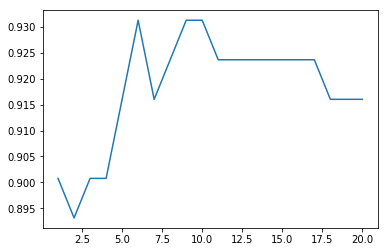

In [17]:
plt.plot(range(1,21),test_scores)

The neighbors values of 6, 9, and 10 all give the highest accuracy score of ~.93.

## Challenge 4

In [18]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_acc = metrics.accuracy_score(y_test, y_pred)
lr_acc

0.9389312977099237

## Challenge 5

In [21]:
repub = cong_data[cong_data["class"]=="republican"].shape[0]
democ = cong_data[cong_data["class"]=="democrat"].shape[0]
counts = (repub, democ)
lab = "Rep", "Dem"

Text(0.5,1,'# Democrats & Republicans')

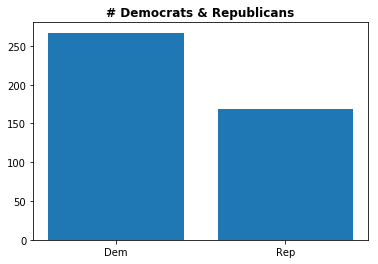

In [22]:
plt.bar(lab, counts)
plt.title("# Democrats & Republicans", weight="bold")

In [23]:
def pred_dems(var):
    return_len = len(var)
    dems = []
    for i in range(return_len):
        dems.append("democrat")
    return dems

In [24]:
cong_data.shape

(435, 17)

In [25]:
preds = pred_dems(X_test.iloc[:,1])

In [26]:
dem_acc = metrics.accuracy_score(y_test, preds)

In [27]:
dem_acc

0.5877862595419847

In [29]:
def pred_reps(var):
    return_len = len(var)
    dems = []
    for i in range(return_len):
        dems.append("republican")
    return dems

In [30]:
preds = pred_reps(X_test.iloc[:,1])

In [31]:
rep_acc = metrics.accuracy_score(y_test,preds)

In [32]:
rep_acc

0.4122137404580153

## Challenge 6

In [33]:
lr_acc = [lr_acc for i in range(1,21)]
dem_acc = [dem_acc for i in range(1,21)]
rep_acc = [rep_acc for i in range(1,21)]

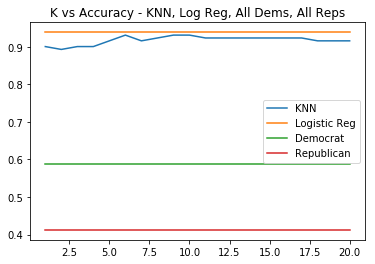

In [39]:
plt.plot(range(1,21),test_scores)
plt.plot(range(1,21),lr_acc)
plt.plot(range(1,21),dem_acc)
plt.plot(range(1,21),rep_acc)
plt.title("K vs Accuracy - KNN, Log Reg, All Dems, All Reps")
plt.legend(('KNN', 'Logistic Reg', 'Democrat', 'Republican'))

## Challenge 7

In [204]:
from sklearn.learning_curve import learning_curve

In [65]:
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y, cv=10)

In [66]:
train_sizes

array([ 39, 127, 215, 303, 391])

In [67]:
train_scores

array([[0.94871795, 0.97435897, 0.97435897, 0.97435897, 0.97435897,
        0.97435897, 0.97435897, 0.97435897, 0.97435897, 0.97435897],
       [0.97637795, 0.98425197, 0.96850394, 0.97637795, 0.97637795,
        0.97637795, 0.97637795, 0.97637795, 0.97637795, 0.97637795],
       [0.96744186, 0.97209302, 0.97209302, 0.97674419, 0.97209302,
        0.98139535, 0.98139535, 0.98139535, 0.98139535, 0.98139535],
       [0.97029703, 0.97689769, 0.97689769, 0.97359736, 0.9669967 ,
        0.98349835, 0.9669967 , 0.97359736, 0.97359736, 0.97359736],
       [0.97186701, 0.97186701, 0.97186701, 0.97186701, 0.96930946,
        0.97953964, 0.96930946, 0.96930946, 0.97186701, 0.97186701]])

In [68]:
valid_scores

array([[0.97727273, 0.90909091, 0.93181818, 0.84090909, 0.97727273,
        0.93181818, 0.95454545, 0.93023256, 0.80952381, 0.88095238],
       [0.97727273, 0.93181818, 0.97727273, 0.88636364, 0.97727273,
        0.93181818, 0.95454545, 0.90697674, 0.83333333, 0.92857143],
       [0.97727273, 0.93181818, 0.97727273, 0.88636364, 0.97727273,
        0.90909091, 1.        , 0.95348837, 0.83333333, 0.97619048],
       [0.97727273, 0.95454545, 0.97727273, 0.97727273, 1.        ,
        0.90909091, 1.        , 0.97674419, 0.83333333, 0.97619048],
       [0.97727273, 0.97727273, 0.97727273, 0.93181818, 1.        ,
        0.93181818, 1.        , 0.95348837, 0.85714286, 0.97619048]])

In [69]:
import numpy as np

In [70]:
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)

In [71]:
train_cv_err

array([0.97179487, 0.97637795, 0.97674419, 0.97359736, 0.97186701])

In [72]:
test_cv_err

array([0.9143436 , 0.93052451, 0.94221031, 0.95817225, 0.95822763])

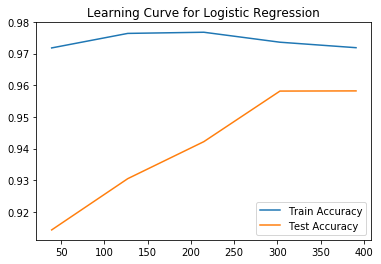

In [73]:
plt.plot(train_sizes, train_cv_err)
plt.plot(train_sizes, test_cv_err)
plt.title("Learning Curve for Logistic Regression")
plt.legend(("Train Accuracy", "Test Accuracy"));

In [74]:
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors = 6), X, y, cv=10)

In [75]:
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)

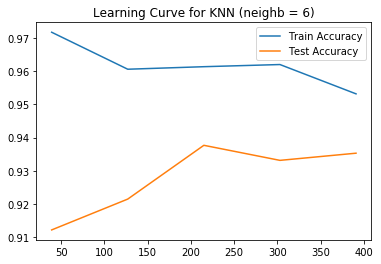

In [77]:
plt.plot(train_sizes, train_cv_err)
plt.plot(train_sizes, test_cv_err)
plt.title("Learning Curve for KNN (neighb = 6)")
plt.legend(("Train Accuracy", "Test Accuracy"))

## Challenge 8

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
GB = GaussianNB()

In [81]:
GB.fit(X_train, y_train)

GaussianNB(priors=None)

In [82]:
preds = GB.predict(X_test)

In [83]:
metrics.accuracy_score(y_test, preds)

0.9389312977099237

In [84]:
from sklearn.svm import SVC

In [85]:
SuppVC = SVC()
SuppVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
preds = SuppVC.predict(X_test)

In [87]:
metrics.accuracy_score(y_test, preds)

0.9541984732824428

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
DT = DecisionTreeClassifier()

In [90]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
preds = DT.predict(X_test)

In [92]:
metrics.accuracy_score(y_test, preds)

0.9312977099236641

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
RF = RandomForestClassifier()

In [95]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
preds = RF.predict(X_test)

In [97]:
metrics.accuracy_score(y_test, preds)

0.9541984732824428

## Challenge 9

In [116]:
from sklearn.cross_validation import cross_val_score

In [98]:
KNNs = cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5)

In [103]:
KNNs.mean()

0.9333260431095235

In [100]:
LRs = cross_val_score(LogisticRegression(), X, y, cv=5)

In [102]:
LRs.mean()

0.9584839979587374

In [104]:
GBs = cross_val_score(GaussianNB(), X, y, cv=5)

In [105]:
GBs.mean()

0.9401442249277053

In [108]:
SVCs = cross_val_score(SVC(), X, y, cv=5)

In [109]:
SVCs.mean()

0.953965274233919

In [110]:
DCTs = cross_val_score(DecisionTreeClassifier(),X,y,cv=5)

In [111]:
DCTs.mean()

0.9400907632864328

In [112]:
RFs = cross_val_score(RandomForestClassifier(),X,y,cv=5)

In [113]:
RFs.mean()

0.9608095793540862

## Challenge 10

In [102]:
from statistics import mode

In [103]:
cols = ["class", "handicap", "water_share","budget_res", "physician_fee", "el_sal","religion_school","satellite_ban","nicaraguan_contras","missile", "immigration","synfuel","educ_spend","superfund_right","crime","duty_free_exp","exp_admin_SA"]

In [104]:
cong_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",names=cols)

In [105]:
def convert_yn(x):
    if x=="y":
        return 1
    elif x=="n":
        return 0

In [106]:
reassign_cols = cong_data.columns[1:]

In [107]:
reassign_cols

Index(['handicap', 'water_share', 'budget_res', 'physician_fee', 'el_sal',
       'religion_school', 'satellite_ban', 'nicaraguan_contras', 'missile',
       'immigration', 'synfuel', 'educ_spend', 'superfund_right', 'crime',
       'duty_free_exp', 'exp_admin_SA'],
      dtype='object')

In [108]:
for i in reassign_cols:
    cong_data[i] = cong_data[i].apply(lambda x: convert_yn(x))

In [109]:
for i in reassign_cols:
    cong_data[i].fillna(cong_data[i].mode()[0], inplace=True)

In [110]:
cong_data.head()

,class,handicap,water_share,budget_res,physician_fee,el_sal,religion_school,satellite_ban,nicaraguan_contras,missile,immigration,synfuel,educ_spend,superfund_right,crime,duty_free_exp,exp_admin_SA
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [111]:
cong_data.columns

Index(['class', 'handicap', 'water_share', 'budget_res', 'physician_fee',
       'el_sal', 'religion_school', 'satellite_ban', 'nicaraguan_contras',
       'missile', 'immigration', 'synfuel', 'educ_spend', 'superfund_right',
       'crime', 'duty_free_exp', 'exp_admin_SA'],
      dtype='object')

In [112]:
y = cong_data.iloc[:,6]

In [113]:
X = cong_data[['handicap', 'water_share', 'budget_res', 'physician_fee',
       'el_sal', 'satellite_ban', 'nicaraguan_contras',
       'missile', 'immigration', 'synfuel', 'educ_spend', 'superfund_right',
       'crime', 'duty_free_exp', 'exp_admin_SA']]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 4444)

In [117]:
knn_vote_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5),  X, y, cv=5)

In [195]:
knn_vote_scores.mean()

0.7999009744599159

## Challenge 11

In [317]:
movies = pd.read_csv("2013_movies.csv")

In [318]:
movies.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [319]:
G_mov = movies[movies["Rating"]=="G"].shape[0]
PG_mov = movies[movies["Rating"]=="PG"].shape[0]
PG_13_mov = movies[movies["Rating"]=="PG-13"].shape[0]
R_mov = movies[movies["Rating"]=="R"].shape[0]
ratings = ["G", "PG", "PG-13", "R"]
ratings_count = [G_mov, PG_mov, PG_13_mov, G_mov]

<Container object of 4 artists>

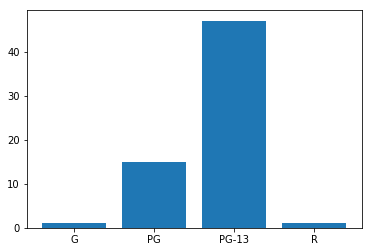

In [320]:
plt.bar(ratings, ratings_count)

In [321]:
movies.fillna(0, inplace=True)

In [322]:
X = movies[["Budget", "DomesticTotalGross", "Runtime"]]
y = movies["Rating"]

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 4444)


In [324]:
knn_movies = cross_val_score(KNeighborsClassifier(n_neighbors = 5), X, y, cv=5)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


In [325]:
knn_movies.mean()

0.31647300068352696

In [326]:
lr_movies = cross_val_score(LogisticRegression(), X, y, cv=5)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


In [327]:
lr_movies.mean()

0.5057188425609478

In [129]:
def pred_most_popular(x):
    len_ratings = x.shape[0]
    preds_popular = []
    for i in range(0,len_ratings):
        preds_popular.append("PG-13")
    return preds_popular

In [130]:
pg_13_preds = pred_most_popular(X_test)

In [131]:
metrics.accuracy_score(y_test, pg_13_preds)

0.4666666666666667

KNN is slightly worse than the baseline, whereas Logistic Regression is slightly better.

In [141]:
logreg = LogisticRegression(C=10000000)
logreg.fit(X_train, y_train)

LogisticRegression(C=10000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [142]:
X.columns

Index(['Budget', 'DomesticTotalGross', 'Runtime'], dtype='object')

In [143]:
logreg.coef_

array([[-2.67915044e-06, -3.26666799e-09, -2.13090402e-08],
       [ 9.06363723e-10, -1.34784658e-08, -2.91723598e-13],
       [ 4.41381080e-09, -2.48715661e-09, -7.54329431e-15],
       [-1.01858788e-08, -1.58317563e-10,  3.10983611e-14]])

## Challenge 12

In [358]:
cols = ["age", "year", "pos_nodes", "survive"]

In [359]:
bc_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",names = cols)

1 Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year


In [360]:
#avg age of all patients
bc_data["age"].mean()

52.45751633986928

In [361]:
#std of all patients
bc_data["age"].std()

10.80345234930328

In [362]:
#survived +5 yrs
bc_data_1 = bc_data[bc_data["survive"]==1]

In [363]:
survive_age = bc_data_1["age"].mean()

In [364]:
bc_data_1["age"].std()

11.012154179929546

In [365]:
#did not survive +5 yrs
bc_data_2 = bc_data[bc_data["survive"]==2]

In [366]:
no_survive_age = bc_data_2["age"].mean()
no_survive_age

53.67901234567901

In [367]:
bc_data_2["age"].std()

10.16713720829741

In [368]:
ages = (survive_age, no_survive_age)
desc = ["Survive", "No Survive"]

In [369]:
survive_nodes = bc_data_1["pos_nodes"].mean()

In [370]:
no_survive_nodes = bc_data_2["pos_nodes"].mean()

In [371]:
nodes = (survive_nodes, no_survive_nodes)

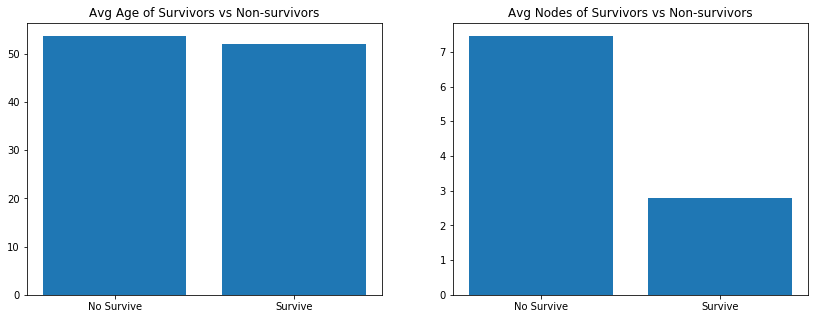

In [372]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.bar(desc,ages)
plt.title("Avg Age of Survivors vs Non-survivors")

plt.subplot(1,2,2)
plt.bar(desc, nodes)
plt.title("Avg Nodes of Survivors vs Non-survivors");

In [373]:
bc_data["year"].min()

58

In [374]:
bc_data["year"].max()

69

In [375]:
bc_data.head(1)

,age,year,pos_nodes,survive
0,30,64,1,1


In [396]:
def ones_zeros(x):
    if x==2:
        return 1
    else:
        return 0

In [397]:
bc_data["survive_2"] = bc_data["survive"].apply(lambda x: ones_zeros(x))

In [398]:
X = bc_data.iloc[:,0:3]
y = bc_data.iloc[:,4]

In [399]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 4444)


In [379]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8152173913043478

In [380]:
lr.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

The number of positive nodes has the biggest influence on whether a patient survives or not. 

In [233]:
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y, cv=5)


In [234]:
train_sizes

array([ 24,  79, 134, 189, 244])

In [235]:
train_scores

array([[0.91666667, 0.91666667, 0.91666667, 0.91666667, 0.91666667],
       [0.82278481, 0.79746835, 0.81012658, 0.81012658, 0.81012658],
       [0.7238806 , 0.71641791, 0.7761194 , 0.7761194 , 0.7761194 ],
       [0.75661376, 0.75132275, 0.77248677, 0.74603175, 0.73015873],
       [0.74590164, 0.74180328, 0.76229508, 0.74180328, 0.75409836]])

In [236]:
valid_scores

array([[0.67741935, 0.73770492, 0.73770492, 0.73770492, 0.73770492],
       [0.75806452, 0.75409836, 0.68852459, 0.42622951, 0.26229508],
       [0.74193548, 0.75409836, 0.75409836, 0.7704918 , 0.6557377 ],
       [0.77419355, 0.75409836, 0.72131148, 0.78688525, 0.75409836],
       [0.75806452, 0.75409836, 0.72131148, 0.75409836, 0.73770492]])

In [237]:
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)

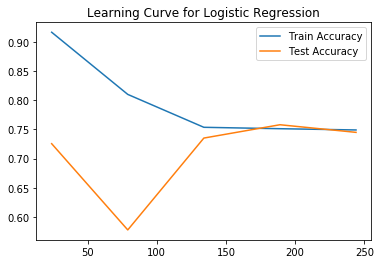

In [238]:
plt.plot(train_sizes, train_cv_err)
plt.plot(train_sizes, test_cv_err)
plt.title("Learning Curve for Logistic Regression")
plt.legend(("Train Accuracy", "Test Accuracy"));

# CHALLENGE SET 8

## Challenge 1

In [239]:
cols = ["class", "handicap", "water_share","budget_res", "physician_fee", "el_sal","religion_school","satellite_ban","nicaraguan_contras","missile", "immigration","synfuel","educ_spend","superfund_right","crime","duty_free_exp","exp_admin_SA"]

In [240]:
cong_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",names=cols)

In [241]:
def convert_yn(x):
    if x=="y":
        return 1
    elif x=="n":
        return 0

In [242]:
reassign_cols = cong_data.columns[1:]

In [243]:
for i in reassign_cols:
    cong_data[i] = cong_data[i].apply(lambda x: convert_yn(x))

In [244]:
for i in reassign_cols:
    cong_data[i].fillna(cong_data[i].mean(), inplace=True)

In [245]:
cong_data.head()

,class,handicap,water_share,budget_res,physician_fee,el_sal,religion_school,satellite_ban,nicaraguan_contras,missile,immigration,synfuel,educ_spend,superfund_right,crime,duty_free_exp,exp_admin_SA
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [246]:
def convert_party_numeric(x):
    if x=="democrat":
        return 1
    else:
        return 0

In [247]:
cong_data["class_num"] = cong_data["class"].apply(lambda x: convert_party_numeric(x))

In [248]:
from sklearn.model_selection import train_test_split

In [265]:
X = cong_data.iloc[:,1:17]
y = cong_data.iloc[:,17]

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 4444)



In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [258]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("KNN Precision: ", metrics.precision_score(y_test, y_pred))
print("KNN Recall: ", metrics.recall_score(y_test, y_pred))
print("KNN F1: ", metrics.f1_score(y_test, y_pred))


KNN Accuracy:  0.916030534351145
KNN Precision:  0.9342105263157895
KNN Recall:  0.922077922077922
KNN F1:  0.9281045751633986


In [259]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Precision: ", metrics.precision_score(y_test, y_pred))
print("Logistic Regression Recall: ", metrics.recall_score(y_test, y_pred))
print("Logistic Regression F1: ", metrics.f1_score(y_test, y_pred))


Logistic Regression Accuracy:  0.9389312977099237
Logistic Regression Precision:  0.9259259259259259
Logistic Regression Recall:  0.974025974025974
Logistic Regression F1:  0.949367088607595


In [261]:
from sklearn.naive_bayes import GaussianNB

GB = GaussianNB()

GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)

print("Naive Bayes Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Naive Bayes Precision: ", metrics.precision_score(y_test, y_pred))
print("Naive Bayes Recall: ", metrics.recall_score(y_test, y_pred))
print("Naive Bayes F1: ", metrics.f1_score(y_test, y_pred))


Naive Bayes Accuracy:  0.9389312977099237
Naive Bayes Precision:  0.9156626506024096
Naive Bayes Recall:  0.987012987012987
Naive Bayes F1:  0.95


In [262]:
from sklearn.svm import SVC

SuppVC = SVC()
SuppVC.fit(X_train, y_train)

y_pred = SuppVC.predict(X_test)


print("SVC Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("SVC Precision: ", metrics.precision_score(y_test, y_pred))
print("SVC Recall: ", metrics.recall_score(y_test, y_pred))
print("SVC F1: ", metrics.f1_score(y_test, y_pred))


SVC Accuracy:  0.9541984732824428
SVC Precision:  0.9493670886075949
SVC Recall:  0.974025974025974
SVC F1:  0.9615384615384615


In [263]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)


print("Decision Tree Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Decision Tree Precision: ", metrics.precision_score(y_test, y_pred))
print("Decision Tree Recall: ", metrics.recall_score(y_test, y_pred))
print("Decision Tree F1: ", metrics.f1_score(y_test, y_pred))


Decision Tree Accuracy:  0.9465648854961832
Decision Tree Precision:  0.9487179487179487
Decision Tree Recall:  0.961038961038961
Decision Tree F1:  0.9548387096774195


In [264]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print("Random Forest Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Random Forest Precision: ", metrics.precision_score(y_test, y_pred))
print("Random Forest Recall: ", metrics.recall_score(y_test, y_pred))
print("Random Forest F1: ", metrics.f1_score(y_test, y_pred))


Random Forest Accuracy:  0.9541984732824428
Random Forest Precision:  0.9493670886075949
Random Forest Recall:  0.974025974025974
Random Forest F1:  0.9615384615384615


## Challenge 2

In [271]:
probs = knn.predict_proba(X_test)

In [273]:
prob_pred = probs[:,1]

In [276]:
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_pred)

In [282]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9484126984126984

Text(0.5,1,'ROC for KNN')

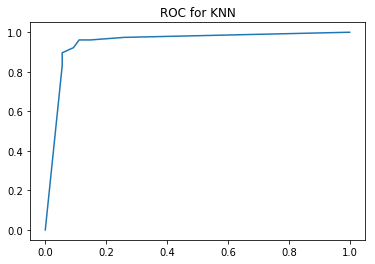

In [283]:
plt.plot(fpr, tpr)
plt.title("ROC for KNN")

Text(0.5,1,'ROC for Logistic Regression')

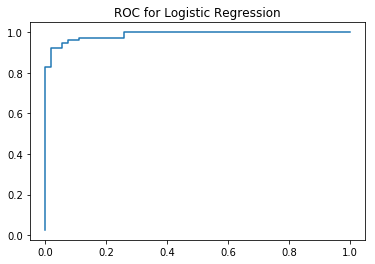

In [293]:
probs = lr.predict_proba(X_test)

prob_pred = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_pred)

plt.plot(fpr, tpr)
plt.title("ROC for Logistic Regression")

In [294]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9877344877344877

Text(0.5,1,'ROC for Naive Bayes')

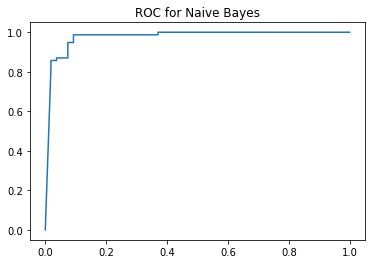

In [288]:
probs = GB.predict_proba(X_test)

prob_pred = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_pred)

plt.plot(fpr, tpr)
plt.title("ROC for Naive Bayes")

In [295]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9877344877344877

Text(0.5,1,'ROC for Decision Tree')

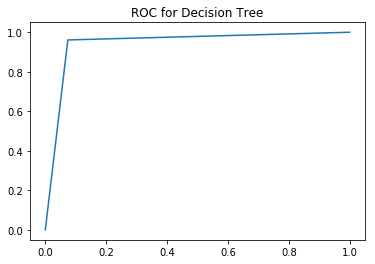

In [297]:
probs = DT.predict_proba(X_test)

prob_pred = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_pred)

plt.plot(fpr, tpr)
plt.title("ROC for Decision Tree")

In [298]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9434824434824436

Text(0.5,1,'ROC for Random Forest')

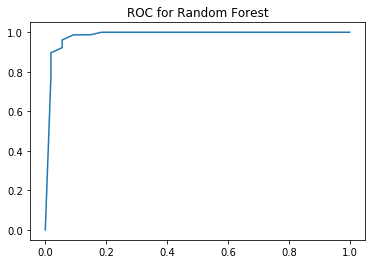

In [300]:
probs = RF.predict_proba(X_test)

prob_pred = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_pred)

plt.plot(fpr, tpr)
plt.title("ROC for Random Forest")

In [301]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9834054834054835

## Challenge 3

In [310]:
print("KNN")
print("Accuracy: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="accuracy").mean())
print("Precision: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="precision").mean())
print("Recall: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="recall").mean())
print("F1: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="f1").mean())

KNN
Accuracy:  0.9265607154139632
Precision:  0.9696886446886447
Recall:  0.9104122990915444
F1:  0.9374288340667356


In [ ]:
print("KNN")
print("Accuracy: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="accuracy").mean())
print("Precision: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="precision").mean())
print("Recall: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="recall").mean())
print("F1: ", cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv=5, scoring="f1").mean())

In [311]:
print("Logistic Regression")
print("Accuracy: ", cross_val_score(LogisticRegression(), X, y, cv=5, scoring="accuracy").mean())
print("Precision: ", cross_val_score(LogisticRegression(), X, y, cv=5, scoring="precision").mean())
print("Recall: ", cross_val_score(LogisticRegression(), X, y, cv=5, scoring="recall").mean())
print("F1: ", cross_val_score(LogisticRegression(), X, y, cv=5, scoring="f1").mean())

Logistic Regression
Accuracy:  0.9584839979587374
Precision:  0.9698715754645673
Recall:  0.9624737945492662
F1:  0.9657243730893548


In [312]:
print("Naive Bayes")
print("Accuracy: ", cross_val_score(GaussianNB(), X, y, cv=5, scoring="accuracy").mean())
print("Precision: ", cross_val_score(GaussianNB(), X, y, cv=5, scoring="precision").mean())
print("Recall: ", cross_val_score(GaussianNB(), X, y, cv=5, scoring="recall").mean())
print("F1: ", cross_val_score(GaussianNB(), X, y, cv=5, scoring="f1").mean())

Naive Bayes
Accuracy:  0.9401442249277053
Precision:  0.9581816059757238
Recall:  0.9438155136268345
F1:  0.950243134045851


In [313]:
print("SVC")
print("Accuracy: ", cross_val_score(SVC(), X, y, cv=5, scoring="accuracy").mean())
print("Precision: ", cross_val_score(SVC(), X, y, cv=5, scoring="precision").mean())
print("Recall: ", cross_val_score(SVC(), X, y, cv=5, scoring="recall").mean())
print("F1: ", cross_val_score(SVC(), X, y, cv=5, scoring="f1").mean())

SVC
Accuracy:  0.953965274233919
Precision:  0.9772158511901587
Recall:  0.947519217330538
F1:  0.9615331842409958


In [315]:
print("Decision Tree")
print("Accuracy: ", cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="accuracy").mean())
print("Precision: ", cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="precision").mean())
print("Recall: ", cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="recall").mean())
print("F1: ", cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="f1").mean())

Decision Tree
Accuracy:  0.944689071954509
Precision:  0.9663383838383839
Recall:  0.9401118099231306
F1:  0.9468133622502022


In [316]:
print("Random Forest")
print("Accuracy: ", cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring="accuracy").mean())
print("Precision: ", cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring="precision").mean())
print("Recall: ", cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring="recall").mean())
print("F1: ", cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring="f1").mean())

Random Forest
Accuracy:  0.9562641248086317
Precision:  0.9771723646723647
Recall:  0.9475890985324946
F1:  0.9712176980155973


## Challenge 4

In [ ]:
movies = pd.read_csv("2013_movies.csv")

movies.columns

G_mov = movies[movies["Rating"]=="G"].shape[0]
PG_mov = movies[movies["Rating"]=="PG"].shape[0]
PG_13_mov = movies[movies["Rating"]=="PG-13"].shape[0]
R_mov = movies[movies["Rating"]=="R"].shape[0]
ratings = ["G", "PG", "PG-13", "R"]
ratings_count = [G_mov, PG_mov, PG_13_mov, G_mov]

movies.fillna(0, inplace=True)

X = movies[["Budget", "DomesticTotalGross", "Runtime"]]
y = movies["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 4444)




In [335]:
knn_movies = KNeighborsClassifier(n_neighbors = 5)
knn_movies.fit(X_train, y_train)
y_pred = list(knn_movies.predict(X_test))

In [ ]:
return tp / (tp + fp)

In [339]:
def calc_precision(test, pred, category):
    true_pos = 0
    false_pos = 0
    for i in range(0,len(test)):
        if test[i]==category:
            if test[i]==pred[i]:
                true_pos +=1
        else:
            if pred[i]==category:
                false_pos+=1
    return true_pos/(true_pos+false_pos)

In [343]:
calc_precision(list(y_test),y_pred, "PG" )

1.0

In [344]:
calc_precision(list(y_test),y_pred, "PG-13" )

0.6875

In [345]:
calc_precision(list(y_test),y_pred, "R" )

0.5384615384615384

In [353]:
def calc_recall(test, pred, category):
    true_pos = 0
    false_neg = 0
    for i in range(0,len(test)):
        if test[i]==category:
            if test[i]==pred[i]:
                true_pos +=1
            elif test[i] != pred[i]:
                false_neg +=1
    return true_pos/(true_pos+false_neg)

In [354]:
calc_recall(list(y_test), y_pred,"PG")

0.14285714285714285

In [356]:
calc_recall(list(y_test), y_pred,"PG-13")

0.7857142857142857

In [357]:
calc_recall(list(y_test), y_pred,"R")

0.7777777777777778

## Challenge 5

In [400]:
prob_preds = lr.predict_proba(X_test)[:,1]

In [401]:
prob_preds.shape

(92,)

Text(0.5,1,'ROC for Logistic Regression')

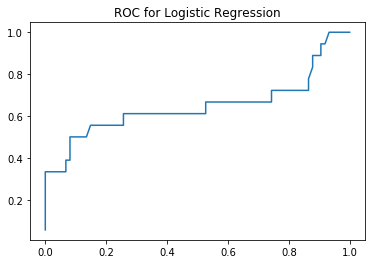

In [402]:
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_preds)

plt.plot(fpr, tpr)
plt.title("ROC for Logistic Regression")